In [1]:
%pip install tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   - -------------------------------------- 8.9/276.5 MB 46.3 MB/s eta 0:00:06
   -- ------------------------------------- 19.7/276.5 MB 49.7 MB/s eta 0:00:06
   ---- ----------------------------------- 28.0/276.5 MB 46.9 MB/s eta 0:00:06
   ----- ---------------------------------- 36.4/276.5 MB 44.6 MB/s eta 0:00:06
   ------ --------------------------------- 45.6/276.5 MB 44.7 MB/s eta 0:00:06
   -------- ------------------------------- 56.1/276.5 MB 45.2 MB/s eta 0:00:05
   -------- ------------------------------- 61.6/276.5 MB 42.7 MB/s eta 0:00:06
   ---------- ----------------------------- 71.6/276.5 MB 43.5 MB/s eta 0:00:05


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.4.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


Epoch 1/20
127/127 [==============================] - 3s 8ms/step - loss: 0.6717 - accuracy: 0.5824 - val_loss: 0.7138 - val_accuracy: 0.5699
Epoch 2/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6368 - accuracy: 0.6320 - val_loss: 0.6763 - val_accuracy: 0.5719
Epoch 3/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6237 - accuracy: 0.6503 - val_loss: 0.7149 - val_accuracy: 0.5669
Epoch 4/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6184 - accuracy: 0.6563 - val_loss: 0.7401 - val_accuracy: 0.5728
Epoch 5/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6119 - accuracy: 0.6592 - val_loss: 0.7286 - val_accuracy: 0.5699
Epoch 6/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6072 - accuracy: 0.6677 - val_loss: 0.7443 - val_accuracy: 0.5045
Epoch 7/20
127/127 [==============================] - 1s 4ms/step - loss: 0.6018 - accuracy: 0.6679 - val_loss: 0.7513 - val_accuracy: 0.5035
Epoch 

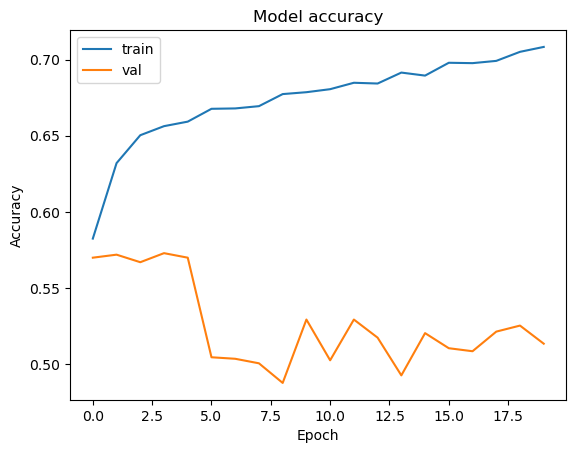

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load your merged dataset
df = pd.read_csv("cleaned_merged_stock_topic_data_3.csv")

# 2. Prepare features and target
features = df.drop(columns=["Date", "Direction",'Stock','Unnamed: 0'])  # Drop non-feature columns
target = df["Direction"]

# 3. Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. Create sequences
def create_sequences(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X, y = create_sequences(features_scaled, target, TIME_STEPS)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# After splitting X_train, X_test, y_train, y_test
# First map 'Up' -> 1, 'Down' -> 0
y_train = y_train.map({'Down': 0, 'Up': 1})
y_test = y_test.map({'Down': 0, 'Up': 1})

# Now convert to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


# After splitting X_train, X_test, y_train, y_test
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 8. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv("merged_stock_topic_data_3.csv")

# First, if Date is not parsed, parse it
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Now drop rows where Date is NaT (missing or invalid dates)
df = df.dropna(subset=["Date"])

# Reset index after dropping
df = df.reset_index(drop=True)

# Save if needed
df.to_csv("cleaned_merged_stock_topic_data_3.csv", index=False)

# Preview cleaned data
print(df.head())


   Unnamed: 0       Date Stock        Open        High         Low  \
0        1275 2024-07-03  AAPL  168.355039  169.927615  167.698152   
1        1276 2024-07-03  ABBV  175.786506  176.008418  173.229638   
2        1277 2024-07-03  ADBE  550.000000  558.380005  541.590027   
3        1278 2024-07-03   AMD  212.520004  213.830002  208.220001   
4        1279 2024-07-03  AMZN  174.830002  177.990005  173.720001   

        Close    Volume  Daily_Return  Volatility_10  ...  topic_-1  topic_0  \
0  168.205749  71765100     -0.000710       0.010864  ...        56        1   
1  174.223450   6125200     -0.002706       0.009497  ...        56        1   
2  556.039978   2660500      0.023845       0.020994  ...        56        1   
3  211.380005  63869000      0.003561       0.034135  ...        56        1   
4  176.820007  34063300      0.019077       0.012065  ...        56        1   

   topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  topic_7 topic_8  
0       19        1    